In [1]:
# import initial libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import warnings

In [2]:
df = pd.read_csv('data/zillow_data.csv')

In [3]:
df.columns = df.columns.str.strip().str.lower()

In [4]:
df['zipcode'] = df['regionname']
df['county'] = df['countyname']
df.drop(['regionname', 'sizerank', 'countyname'],axis=1,inplace=True)
df

,regionid,city,state,metro,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,...,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,zipcode,county
0,84654,Chicago,IL,Chicago,334200.0,335400.0,336500.0,337600.0,338500.0,339500.0,...,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600,60657,Cook
1,90668,McKinney,TX,Dallas-Fort Worth,235700.0,236900.0,236700.0,235400.0,233300.0,230600.0,...,312500,314100,315000,316600,318100,319600,321100,321800,75070,Collin
2,91982,Katy,TX,Houston,210400.0,212200.0,212200.0,210700.0,208300.0,205500.0,...,320200,320400,320800,321200,321200,323000,326900,329900,77494,Harris
3,84616,Chicago,IL,Chicago,498100.0,500900.0,503100.0,504600.0,505500.0,505700.0,...,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000,60614,Cook
4,93144,El Paso,TX,El Paso,77300.0,77300.0,77300.0,77300.0,77400.0,77500.0,...,120000,120300,120300,120300,120300,120500,121000,121500,79936,El Paso
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14718,58333,Ashfield,MA,Greenfield Town,94600.0,94300.0,94000.0,93700.0,93400.0,93200.0,...,218600,218500,218100,216400,213100,209800,209200,209300,1338,Franklin
14719,59107,Woodstock,NH,Claremont,92700.0,92500.0,92400.0,92200.0,92100.0,91900.0,...,212200,215200,214300,213100,213700,218300,222700,225800,3293,Grafton
14720,75672,Berea,KY,Richmond,57100.0,57300.0,57500.0,57700.0,58000.0,58200.0,...,124600,126700,128800,130600,131700,132500,133000,133400,40404,Madison
14721,93733,Mount Crested Butte,CO,NaN,191100.0,192400.0,193700.0,195000.0,196300.0,197700.0,...,682400,695600,695500,694700,706400,705300,681500,664400,81225,Gunnison


In [5]:
cols = df.columns
cols[4:97]

Index(['1996-04', '1996-05', '1996-06', '1996-07', '1996-08', '1996-09',
       '1996-10', '1996-11', '1996-12', '1997-01', '1997-02', '1997-03',
       '1997-04', '1997-05', '1997-06', '1997-07', '1997-08', '1997-09',
       '1997-10', '1997-11', '1997-12', '1998-01', '1998-02', '1998-03',
       '1998-04', '1998-05', '1998-06', '1998-07', '1998-08', '1998-09',
       '1998-10', '1998-11', '1998-12', '1999-01', '1999-02', '1999-03',
       '1999-04', '1999-05', '1999-06', '1999-07', '1999-08', '1999-09',
       '1999-10', '1999-11', '1999-12', '2000-01', '2000-02', '2000-03',
       '2000-04', '2000-05', '2000-06', '2000-07', '2000-08', '2000-09',
       '2000-10', '2000-11', '2000-12', '2001-01', '2001-02', '2001-03',
       '2001-04', '2001-05', '2001-06', '2001-07', '2001-08', '2001-09',
       '2001-10', '2001-11', '2001-12', '2002-01', '2002-02', '2002-03',
       '2002-04', '2002-05', '2002-06', '2002-07', '2002-08', '2002-09',
       '2002-10', '2002-11', '2002-12', '2003-01', 

In [6]:
df.drop(df.columns[np.r_[0,4:97]], axis=1, inplace=True)

In [7]:
df

,city,state,metro,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,...,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,zipcode,county
0,Chicago,IL,Chicago,755300.0,759200.0,764000.0,769600.0,775600.0,781900.0,787900.0,...,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600,60657,Cook
1,McKinney,TX,Dallas-Fort Worth,187700.0,188800.0,190300.0,191800.0,193000.0,193900.0,194500.0,...,312500,314100,315000,316600,318100,319600,321100,321800,75070,Collin
2,Katy,TX,Houston,231800.0,233100.0,233500.0,233000.0,232100.0,231300.0,230700.0,...,320200,320400,320800,321200,321200,323000,326900,329900,77494,Harris
3,Chicago,IL,Chicago,1014500.0,1017000.0,1020500.0,1024900.0,1029800.0,1035100.0,1040500.0,...,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000,60614,Cook
4,El Paso,TX,El Paso,84000.0,84700.0,85500.0,86400.0,87200.0,88000.0,88900.0,...,120000,120300,120300,120300,120300,120500,121000,121500,79936,El Paso
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14718,Ashfield,MA,Greenfield Town,166000.0,168700.0,171400.0,174100.0,176800.0,179200.0,180800.0,...,218600,218500,218100,216400,213100,209800,209200,209300,1338,Franklin
14719,Woodstock,NH,Claremont,152500.0,159300.0,164300.0,166800.0,167700.0,168200.0,169400.0,...,212200,215200,214300,213100,213700,218300,222700,225800,3293,Grafton
14720,Berea,KY,Richmond,98000.0,98900.0,99300.0,98800.0,97500.0,95800.0,94300.0,...,124600,126700,128800,130600,131700,132500,133000,133400,40404,Madison
14721,Mount Crested Butte,CO,NaN,432200.0,435900.0,439500.0,443400.0,448000.0,453600.0,460500.0,...,682400,695600,695500,694700,706400,705300,681500,664400,81225,Gunnison


In [8]:
df = df[df['state']=='TX']

In [9]:
#Calculate historical return on investment
df['roi'] = (df['2018-04']/df['2004-04'])-1
#Calculate standard deviation of monthly values
df['std']=df.loc[:,'2004-04':'2018-04'].std(skipna=True, axis=1)
#Calculate historical mean value
df['mean']=df.loc[:,'2004-04':'2018-04'].mean(skipna=True, axis=1)
#Calculate historical median value
df['median']=df.loc[:,'2004-04':'2018-04'].median(skipna=True,axis=1)
#Calculate coefficient of variance
df['cv']=df['std']/df['mean']
#Show calculated values
df[['zipcode','std','mean','roi','cv']].head()

upper_cv = df.cv.quantile(.75)
print(f'\nCV upper limit: {upper_cv}')

#Get the 5 zipcodes with highest ROIs within the firms risk profile.
zc_best5 = df[df['cv']<upper_cv].sort_values('roi',axis=0,ascending=False)[:5]
print('\n Best 5 Zipcodes on raw historical ROI scores:')
zc_best5[['zipcode','roi','cv', 'city', 'state']]

warnings.filterwarnings('ignore')


CV upper limit: 0.14066138328809583

 Best 5 Zipcodes on raw historical ROI scores:


<ipython-input-9-12c76412fea6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['roi'] = (df['2018-04']/df['2004-04'])-1
<ipython-input-9-12c76412fea6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['std']=df.loc[:,'2004-04':'2018-04'].std(skipna=True, axis=1)
<ipython-input-9-12c76412fea6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

In [10]:
# we want to keep certain cols and get the years + dates
def melt_data(df):
    melted = pd.melt(df, id_vars=['zipcode', 'state', 'city', 'metro', 'county', 'roi', 'mean', 'std','median','cv'], var_name='date')
    melted['date'] = pd.to_datetime(melted['date'], infer_datetime_format=True)
    melted['year'] = [d.year for d in melted.date]
    melted = melted.dropna(subset=['value'])
    return melted
df = melt_data(df)

In [11]:
df.set_index('date',inplace=True)

In [12]:
df

,zipcode,state,city,metro,county,roi,mean,std,median,cv,value,year
date,,,,,,,,,,,,
2004-01-01,75070,TX,McKinney,Dallas-Fort Worth,Collin,0.677789,227716.568047,38254.185393,207200.0,0.167990,187700.0,2004
2004-01-01,77494,TX,Katy,Houston,Harris,0.415880,267233.727811,33191.496845,250800.0,0.124204,231800.0,2004
2004-01-01,79936,TX,El Paso,El Paso,El Paso,0.406250,114244.378698,9571.795485,115400.0,0.083784,84000.0,2004
2004-01-01,77084,TX,Houston,Houston,Harris,0.347826,130317.751479,14234.525170,126200.0,0.109229,119400.0,2004
2004-01-01,77449,TX,Katy,Houston,Harris,0.381961,135117.159763,16603.718071,130000.0,0.122884,123900.0,2004
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-04-01,76941,TX,Mertzon,San Angelo,Irion,NaN,99318.367347,13734.029878,95600.0,0.138283,121600.0,2018
2018-04-01,79313,TX,Anton,Levelland,Hockley,NaN,54424.675325,5286.674724,53500.0,0.097137,63300.0,2018
2018-04-01,79355,TX,Plains,NaN,Yoakum,NaN,78967.346939,12929.465872,77050.0,0.163732,93500.0,2018


In [13]:
# Select the first quantile
q1 = df['value'].quantile(.25)

# Select the third quantile
q3 = df['value'].quantile(.75)


# Create a filtered in between q1 & q3
filtered =df[(df['value']>=q1) 
             & (df['value']<=q3)]
filtered

,zipcode,state,city,metro,county,roi,mean,std,median,cv,value,year
date,,,,,,,,,,,,
2004-01-01,77084,TX,Houston,Houston,Harris,0.347826,130317.751479,14234.525170,126200.0,0.109229,119400.0,2004
2004-01-01,77449,TX,Katy,Houston,Harris,0.381961,135117.159763,16603.718071,130000.0,0.122884,123900.0,2004
2004-01-01,78660,TX,Pflugerville,Austin,Travis,0.536709,180535.502959,22991.034353,171200.0,0.127349,153800.0,2004
2004-01-01,77573,TX,League City,Houston,Galveston,0.539458,200007.100592,23693.121299,191500.0,0.118461,166700.0,2004
2004-01-01,79912,TX,El Paso,El Paso,El Paso,0.431507,172377.514793,11933.135778,175000.0,0.069227,127400.0,2004
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-04-01,76064,TX,Maypearl,Dallas-Fort Worth,Ellis,0.589416,137129.585799,14898.204604,131600.0,0.108643,174200.0,2018
2018-04-01,77577,TX,Liverpool,Houston,Brazoria,0.726852,109286.390533,17469.977427,104900.0,0.159855,149200.0,2018
2018-04-01,77663,TX,Kountze,Beaumont,Hardin,0.291051,131640.236686,11027.623970,129100.0,0.083771,148600.0,2018


In [14]:
df_income = pd.read_csv('data/zip_codes_2019_median_inc.csv')
df_income

,ZIP Code,Type,State FIPS,Preferred name,Alternate names,Population (2019),Housing units (2019),Median family income (2019),MFI percentile (2019),Latitude,Longitude,Land area,Water area
0,501,unique,36,"Holtsville, NY",IRS Service Center,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,544,unique,36,"Holtsville, NY",IRS Service Center,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,601,standard,72,"Adjuntas, PR","Colinas Del Gigante, Jard De Adjuntas, Urb San...","17,113","7,250","$16,001",0.0,18.181000,-66.750000,64.348,0.309
3,602,standard,72,"Aguada, PR","Alts De Aguada, Bo Guaniquilla, Comunidad Las ...","37,751","17,538","$19,801",0.0,18.362000,-67.176003,30.613,1.718
4,603,standard,72,"Aguadilla, PR","Ramey, Bda Caban, Bda Esteves, Bo Borinquen, B...","47,081","24,322","$18,973",0.0,18.455000,-67.120003,31.616,0.071
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41271,99926,PO box,2,"Metlakatla, AK",NaN,"1,654",552,"$70,455",53.0,55.138000,-131.470001,132.798,82.369
41272,99927,PO box,2,"Point Baker, AK",NaN,0,54,NaN,NaN,56.238998,-133.457993,227.680,6.950
41273,99928,PO box,2,"Ward Cove, AK",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41274,99929,PO box,2,"Wrangell, AK",NaN,"2,502","1,463","$69,600",52.0,56.370998,-131.692993,999.999,246.117


In [15]:
df_income['state'] = df_income['Preferred name'].str.slice(-2)

In [16]:
df_income

,ZIP Code,Type,State FIPS,Preferred name,Alternate names,Population (2019),Housing units (2019),Median family income (2019),MFI percentile (2019),Latitude,Longitude,Land area,Water area,state
0,501,unique,36,"Holtsville, NY",IRS Service Center,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NY
1,544,unique,36,"Holtsville, NY",IRS Service Center,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NY
2,601,standard,72,"Adjuntas, PR","Colinas Del Gigante, Jard De Adjuntas, Urb San...","17,113","7,250","$16,001",0.0,18.181000,-66.750000,64.348,0.309,PR
3,602,standard,72,"Aguada, PR","Alts De Aguada, Bo Guaniquilla, Comunidad Las ...","37,751","17,538","$19,801",0.0,18.362000,-67.176003,30.613,1.718,PR
4,603,standard,72,"Aguadilla, PR","Ramey, Bda Caban, Bda Esteves, Bo Borinquen, B...","47,081","24,322","$18,973",0.0,18.455000,-67.120003,31.616,0.071,PR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41271,99926,PO box,2,"Metlakatla, AK",NaN,"1,654",552,"$70,455",53.0,55.138000,-131.470001,132.798,82.369,AK
41272,99927,PO box,2,"Point Baker, AK",NaN,0,54,NaN,NaN,56.238998,-133.457993,227.680,6.950,AK
41273,99928,PO box,2,"Ward Cove, AK",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AK
41274,99929,PO box,2,"Wrangell, AK",NaN,"2,502","1,463","$69,600",52.0,56.370998,-131.692993,999.999,246.117,AK


In [17]:
df_income = df_income[df_income['state']=='TX']
df_income = (df_income[df_income['Type'] != 'PO box'])
df_income

,ZIP Code,Type,State FIPS,Preferred name,Alternate names,Population (2019),Housing units (2019),Median family income (2019),MFI percentile (2019),Latitude,Longitude,Land area,Water area,state
31142,73301,unique,48,"Austin, TX",Irs Service Center,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TX
31143,73344,unique,48,"Austin, TX",Irs Service Center,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TX
31744,75001,standard,48,"Addison, TX",NaN,"14,992","9,298","$79,551",68.0,32.959999,-96.838997,3.834,0.003,TX
31745,75002,standard,48,"Allen, TX","Lucas, Parker","71,253","23,314","$105,656",88.0,33.090000,-96.609001,37.179,2.056,TX
31746,75006,standard,48,"Carrollton, TX",NaN,"51,642","19,178","$72,325",57.0,32.962002,-96.899002,16.875,0.254,TX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34257,79961,unique,48,"El Paso, TX",El Paso Water Utilities,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TX
34258,79968,unique,48,"El Paso, TX",Univ Of Tx Elp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TX
34259,79976,unique,48,"El Paso, TX",Southern Union Gas Co,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TX
34260,79978,unique,48,"El Paso, TX",El Paso Natural Gas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TX


In [18]:
filtered.groupby('zipcode').aggregate({'value': 'median'})

,value
zipcode,
75002,176400.0
75006,141700.0
75007,165200.0
75023,169600.0
75040,111850.0
...,...
79932,168750.0
79934,136700.0
79935,135550.0


In [19]:
len(filtered['zipcode'].unique())

734

In [20]:
df_income['Longitude'].min(), df_income['Longitude'].max()

(-106.608002, -93.615997)

In [21]:
df_income['Latitude'].min(), df_income['Latitude'].max()

(25.944000000000003, 36.380001)

In [22]:
df_income['Median family income (2019)'] = df_income['Median family income (2019)'].str.strip('$\n\t')

In [23]:
df_income['Median family income (2019)'] = df_income['Median family income (2019)'].str.replace(',','')

In [24]:
df_income

,ZIP Code,Type,State FIPS,Preferred name,Alternate names,Population (2019),Housing units (2019),Median family income (2019),MFI percentile (2019),Latitude,Longitude,Land area,Water area,state
31142,73301,unique,48,"Austin, TX",Irs Service Center,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TX
31143,73344,unique,48,"Austin, TX",Irs Service Center,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TX
31744,75001,standard,48,"Addison, TX",NaN,"14,992","9,298",79551,68.0,32.959999,-96.838997,3.834,0.003,TX
31745,75002,standard,48,"Allen, TX","Lucas, Parker","71,253","23,314",105656,88.0,33.090000,-96.609001,37.179,2.056,TX
31746,75006,standard,48,"Carrollton, TX",NaN,"51,642","19,178",72325,57.0,32.962002,-96.899002,16.875,0.254,TX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34257,79961,unique,48,"El Paso, TX",El Paso Water Utilities,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TX
34258,79968,unique,48,"El Paso, TX",Univ Of Tx Elp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TX
34259,79976,unique,48,"El Paso, TX",Southern Union Gas Co,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TX
34260,79978,unique,48,"El Paso, TX",El Paso Natural Gas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TX


In [25]:
df_income['Median family income (2019)'].fillna(df_income['Median family income (2019)'].median(), inplace=True)

In [26]:
df_income['median_family_income'] = df_income['Median family income (2019)'].astype(int)

In [27]:
df_income.drop('Median family income (2019)', axis=1, inplace=True)

In [28]:
df_income.columns = df_income.columns.str.strip().str.lower()

In [29]:
df_income['zip'] = df_income['zip code']
df_income['name'] = df_income['preferred name']
df_income['alternate_name'] = df_income['alternate names']
df_income['pop'] = df_income['population (2019)']
df_income['units'] = df_income['housing units (2019)']
df_income['mfi_percentile'] = df_income['mfi percentile (2019)']

In [30]:
df_income.drop(['zip code', 'preferred name', 'alternate names', 'population (2019)', 'mfi percentile (2019)'], axis=1, inplace=True)

In [31]:
df_income.head()

,type,state fips,housing units (2019),latitude,longitude,land area,water area,state,median_family_income,zip,name,alternate_name,pop,units,mfi_percentile
31142,unique,48,NaN,NaN,NaN,NaN,NaN,TX,65486,73301,"Austin, TX",Irs Service Center,NaN,NaN,NaN
31143,unique,48,NaN,NaN,NaN,NaN,NaN,TX,65486,73344,"Austin, TX",Irs Service Center,NaN,NaN,NaN
31744,standard,48,"9,298",32.959999,-96.838997,3.834,0.003,TX,79551,75001,"Addison, TX",NaN,"14,992","9,298",68.0
31745,standard,48,"23,314",33.090000,-96.609001,37.179,2.056,TX,105656,75002,"Allen, TX","Lucas, Parker","71,253","23,314",88.0
31746,standard,48,"19,178",32.962002,-96.899002,16.875,0.254,TX,72325,75006,"Carrollton, TX",NaN,"51,642","19,178",57.0


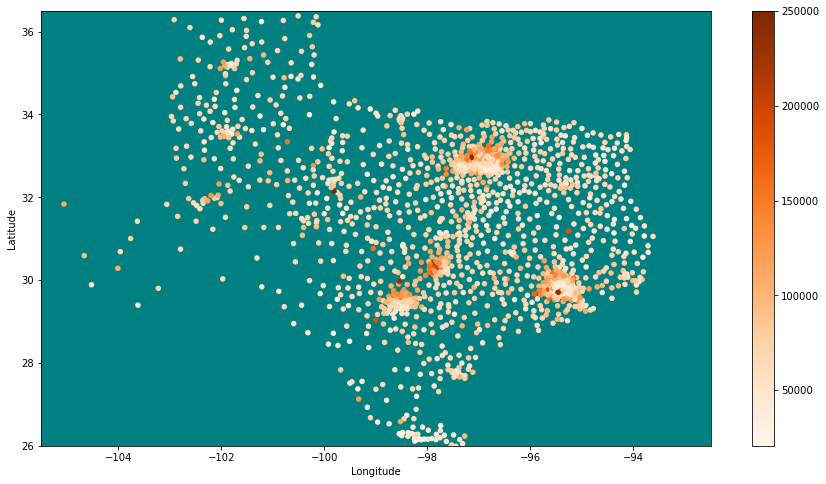

In [32]:
fig, ax = plt.subplots()

hue = np.array(df_income['median_family_income'])
cmap = sns.cubehelix_palette(as_cmap=True)
points = ax.scatter(df_income['longitude'], df_income['latitude'], c=hue, s=20, cmap='Oranges')


ax.set_xlim(((int(df_income['longitude'].min())+.5), (int(df_income['longitude'].max())+.5)))
ax.set_ylim((int(df_income['latitude'].min()+.5), (int(df_income['latitude'].max())+.5)))
ax.set_facecolor('teal')
fig.colorbar(points)
fig.set_size_inches(15,8)
plt.xlabel("Longitude")
plt.ylabel("Latitude");

In [33]:
df.head()

,zipcode,state,city,metro,county,roi,mean,std,median,cv,value,year
date,,,,,,,,,,,,
2004-01-01,75070,TX,McKinney,Dallas-Fort Worth,Collin,0.677789,227716.568047,38254.185393,207200.0,0.167990,187700.0,2004
2004-01-01,77494,TX,Katy,Houston,Harris,0.415880,267233.727811,33191.496845,250800.0,0.124204,231800.0,2004
2004-01-01,79936,TX,El Paso,El Paso,El Paso,0.406250,114244.378698,9571.795485,115400.0,0.083784,84000.0,2004
2004-01-01,77084,TX,Houston,Houston,Harris,0.347826,130317.751479,14234.525170,126200.0,0.109229,119400.0,2004
2004-01-01,77449,TX,Katy,Houston,Harris,0.381961,135117.159763,16603.718071,130000.0,0.122884,123900.0,2004


In [34]:
df_income.head()

,type,state fips,housing units (2019),latitude,longitude,land area,water area,state,median_family_income,zip,name,alternate_name,pop,units,mfi_percentile
31142,unique,48,NaN,NaN,NaN,NaN,NaN,TX,65486,73301,"Austin, TX",Irs Service Center,NaN,NaN,NaN
31143,unique,48,NaN,NaN,NaN,NaN,NaN,TX,65486,73344,"Austin, TX",Irs Service Center,NaN,NaN,NaN
31744,standard,48,"9,298",32.959999,-96.838997,3.834,0.003,TX,79551,75001,"Addison, TX",NaN,"14,992","9,298",68.0
31745,standard,48,"23,314",33.090000,-96.609001,37.179,2.056,TX,105656,75002,"Allen, TX","Lucas, Parker","71,253","23,314",88.0
31746,standard,48,"19,178",32.962002,-96.899002,16.875,0.254,TX,72325,75006,"Carrollton, TX",NaN,"51,642","19,178",57.0


In [35]:
pd.set_option('max_columns',None)
pd.set_option('max_rows',None)

In [47]:
grouped_filter = filtered.groupby('zipcode').aggregate({'value': 'median', 'cv':'median'})

In [50]:
grouped_filter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 734 entries, 75002 to 79938
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   734 non-null    float64
 1   cv      734 non-null    float64
dtypes: float64(2)
memory usage: 17.2 KB


In [48]:
new_df = grouped_filter.merge(df_income, how='left',left_on='zipcode', right_on='zip', right_index=True)

In [51]:
new_df.head()

,value,cv,type,state fips,housing units (2019),latitude,longitude,land area,water area,state,median_family_income,zip,name,alternate_name,pop,units,mfi_percentile
zipcode,,,,,,,,,,,,,,,,,
75002,176400.0,0.158974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75006,141700.0,0.164731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75007,165200.0,0.166803,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75023,169600.0,0.170127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75040,111850.0,0.159905,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
